In [19]:
import os
import numpy as np
from tqdm import tqdm
import json
import glob

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams["font.family"] = "Palatino"
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'figure.figsize': [8,5]})

from utils.rl_glue import RLGlue

In [2]:
def all_files_with_prefix_and_suffix(location, prefix, suffix):
    """returns a list of all files in the 'location' starting with the given prefix"""
    if location[-1] != '/':
        location += '/'
    files = glob.glob(location + prefix + '*' + suffix)

    return files

## A. Control experiments

### A1. Domain: AccessControl

In [ ]:
### To run the experiments with RVI-Q and Diff-Q:

# python run_exp.py --exp run_exp_learning_control_no_eval --config-file config_files/control_AccessControl_diff-q.json --output-folder results/control/AccessControl
# python run_exp.py --exp run_exp_learning_control_no_eval --config-file config_files/control_AccessControl_rvi-q.json --output-folder results/control/AccessControl

### These use sample configuration files. Using them as is will result in LONG runtimes. 
### Try a single hyperparameter configuration, or split them the grid of configurations 
### appropriately for the compute resources available

In [174]:
def parse_data_ac(filename_prefix, item, location='../results/', param1='alpha_w', param2='dummy',
               title=None, firstn=-1, type='heatmap', num_sa=None, logbase=-1, ylabel='RMSVE\n(TVR)'):

    files = all_files_with_prefix_and_suffix(location, filename_prefix, '*.npy')
    data_all = {}
    assert len(files) > 0, 'No files found with the prefix: ' + location + filename_prefix
    print('Filename\t%s\t%s\tValue\n' % (param1, param2))
    for file in files:
        data = np.load(file, allow_pickle=True).item()
        param1_value = data['params']['agent_parameters'][param1]
        if param1_value not in data_all:
            data_all[param1_value] = {}
        param2_value = data['params']['agent_parameters'][param2] if param2!='dummy' else -1
        if param2_value not in data_all[param1_value]:
            data_all[param1_value][param2_value] = {}
        data_to_eval = data[item][:,:firstn]
        mean = np.mean(data_to_eval)
        stderr = np.std(data_to_eval) / np.sqrt(data_to_eval.size)
        data_all[param1_value][param2_value] = (mean, stderr)
        print('%s\t%s\t%s\t%.3f\t%.3f' % (file[-10:-3], param1_value, param2_value, mean, stderr))

    X = sorted(data_all)
    Y = sorted(data_all[np.random.choice(list(data_all.keys()))])
    Z_mean = np.zeros((len(X), len(Y)))
    Z_stderr = np.zeros((len(X), len(Y)))
    for i, x in enumerate(X):
        for j, y in enumerate(Y):
            try:
                Z_mean[i][j] = data_all[x][y][0]
                Z_stderr[i][j] = data_all[x][y][1]
            except:
                Z_mean[i][j] = np.nan
                Z_stderr[i][j] = np.nan

    fig, ax = plt.subplots(1, 1, figsize=(5.5,4))

    for i, param_value in enumerate(X):
        ax.errorbar(Y, Z_mean[i], yerr=Z_stderr[i], label=param1+'='+str(param_value))#, color='color')
    ax.grid(b=True, axis='y', alpha=0.5, linestyle='--')
#     ax.legend()
#     plt.xlabel(param2)
#     plt.ylabel('RMSVE\n(TVR)', rotation=0, labelpad=40)
#     ax.set_title(title)
    plt.ylim(2.05, 2.6)
    if logbase != -1:
        plt.xscale('log', basex=logbase)
    ax.set_xticks(Y)
    ax.set_xticklabels(Y)

    fig.tight_layout()
    assert os.path.isfile(location + title + '.png') == False, "File already exists. Don't overwrite!"
    plt.savefig(location + title + '.png', dpi=1200)
    plt.show()

Filename	eta	alpha_w	Value

6-20_2.	0.5	0.1	2.555	0.002
6-20_3.	1	0.1	2.528	0.002
6-10_4.	2	0.00625	2.531	0.002
6-20_1.	0.25	0.1	2.564	0.002
6-20_0.	0.125	0.1	2.569	0.002
6-10_1.	0.25	0.00625	2.518	0.002
6-20_4.	2	0.1	2.465	0.002
6-10_0.	0.125	0.00625	2.499	0.002
6-10_2.	0.5	0.00625	2.529	0.002
6-10_3.	1	0.00625	2.530	0.002
1-15_4.	2	0.025	2.571	0.002
_1-5_4.	2	0.0015625	2.430	0.002
1-15_2.	0.5	0.025	2.580	0.002
_1-5_1.	0.25	0.0015625	2.401	0.002
_1-5_0.	0.125	0.0015625	2.350	0.002
1-15_3.	1	0.025	2.578	0.002
1-15_1.	0.25	0.025	2.577	0.002
_1-5_2.	0.5	0.0015625	2.418	0.002
_1-5_3.	1	0.0015625	2.427	0.002
1-15_0.	0.125	0.025	2.577	0.002
1-25_2.	0.5	0.4	2.372	0.002
1-25_3.	1	0.4	2.313	0.002
1-25_1.	0.25	0.4	2.419	0.002
1-25_0.	0.125	0.4	2.444	0.002
1-25_4.	2	0.4	2.283	0.002


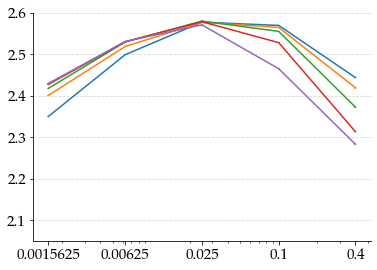

In [176]:
parse_data_ac('AC_DiffQ_eps_0.1', 'rewards_all_train', param1='eta', param2='alpha_w',
               title='AC_DiffQ_eps_0.1_sensitivity', location='./results/control/AccessControl/',
               firstn=-1, type='u-curves', logbase=10, ylabel='Average\nreward\nover\ntraining')

Filename	reference_state	alpha_w	Value

7-12_2.	27	0.00625	2.159	0.002
3-18_0.	43	0.025	2.182	0.002
3-18_1.	35	0.025	2.172	0.002
7-12_3.	19	0.00625	2.241	0.002
7-12_1.	35	0.00625	2.187	0.002
3-18_3.	19	0.025	2.518	0.002
3-18_2.	27	0.025	2.192	0.002
7-12_0.	43	0.00625	2.193	0.002
7-12_4.	11	0.00625	2.540	0.002
7-12_5.	3	0.00625	2.425	0.002
3-18_5.	3	0.025	2.538	0.002
3-18_4.	11	0.025	2.593	0.002
5-30_2.	27	0.4	2.131	0.002
9-24_0.	43	0.1	2.168	0.002
9-24_1.	35	0.1	2.176	0.002
5-30_3.	19	0.4	2.391	0.002
5-30_1.	35	0.4	2.113	0.002
9-24_3.	19	0.1	2.557	0.002
9-24_2.	27	0.1	2.235	0.002
5-30_0.	43	0.4	2.108	0.002
5-30_4.	11	0.4	2.411	0.002
5-30_5.	3	0.4	1.902	0.002
9-24_5.	3	0.1	2.510	0.002
9-24_4.	11	0.1	2.575	0.002
_1-6_3.	19	0.0015625	2.178	0.002
_1-6_2.	27	0.0015625	2.169	0.002
_1-6_0.	43	0.0015625	2.193	0.002
_1-6_1.	35	0.0015625	2.180	0.002
_1-6_5.	3	0.0015625	2.307	0.002
_1-6_4.	11	0.0015625	2.341	0.002


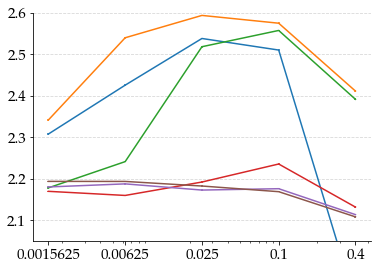

In [177]:
parse_data_ac('AC_RVIQ_eps_0.1', 'rewards_all_train', param1='reference_state', param2='alpha_w',
               title='AC_RVIQ_eps_0.1_sensitivity', location='./results/control/AccessControl/',
               firstn=-1, type='u-curves', logbase=10, ylabel='Average\nreward\nover\ntraining')

In [51]:
def plot_learning_curve_control(filenames, location='./results/', window=1000, sample=1, firstn=-1,
                                      title=None):

    plt.figure(figsize=(5.5, 4))
    which_step_size = 'alpha_w'
    for filename in filenames:
        data = np.load(location + filename, allow_pickle=True).item()
        rewards_train = data['rewards_all_train'][:,:firstn]
        max_run_length = rewards_train.shape[1]
        conv_arr = np.ones(window)
        reward_rate_all = []
        # ToDo: figure out a way to vectorize this
        for run in range(rewards_train.shape[0]):
            reward_rate = np.convolve(rewards_train[run,:], conv_arr, mode='valid') / window
            reward_rate_all.append(reward_rate)
        reward_rate_all = np.array(reward_rate_all)
        mean = np.mean(reward_rate_all, axis=0)
        stderr = np.std(reward_rate_all, axis=0) / np.sqrt(reward_rate_all.shape[0])
        x_s = np.arange(window, max_run_length+1)[::sample]
        y_s = mean[::sample]
        stderr_s = stderr[::sample]
        agent_name = data['params']['agent']
        plt.plot(x_s, y_s, label=agent_name)
        plt.fill_between(x_s, y_s + stderr_s, y_s - stderr_s, alpha=0.3)

    # plt.axhline(y=1.69, color='black', alpha=0.5, linestyle='--')
    plt.grid(b=True, axis='y', alpha=0.5, linestyle='--')
    plt.tight_layout()
    assert os.path.isfile(location + title + '.png') == False, "File already exists. Don't overwrite!"
    plt.savefig(location + title + '.png', dpi=1200)
    plt.show()

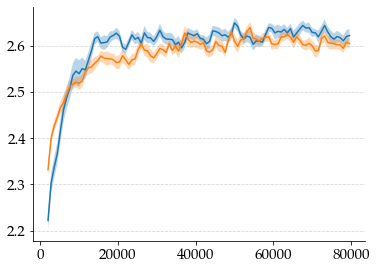

In [195]:
# best, best
### These filenames will be according to how the hyperparameter configurations are split
### for the available compute resources.
filenames = [
        "AC_RVIQ_eps_0.1_13-18_4.npy", # alpha_w=0.025, ref_state=11
        "AC_DiffQ_eps_0.1_11-15_2.npy", # alpha_w=0.025, eta=0.5
    ]
    
plot_learning_curve_control(filenames, title='AC_all_eps_0.1_best', window=2000,
                            sample=800, firstn=-1, location='./results/control/AccessControl/')

### A2. Domain: TwoLoop

In [ ]:
### To run the experiments with RVI-Q and Diff-Q:

# python run_exp.py --exp run_exp_learning_control_no_eval --config-file config_files/control_TwoLoop_diff-q.json --output-folder results/control/TwoLoop
# python run_exp.py --exp run_exp_learning_control_no_eval --config-file config_files/control_TwoLoop_rvi-q.json --output-folder results/control/TwoLoop
# python run_exp.py --exp run_exp_learning_control_no_eval --config-file config_files/control_TwoLoop_rvi-q_ref00.json --output-folder results/control/TwoLoop

In [46]:
def parse_data_tl(filename_prefix, item, location='../results/', param1='alpha_w', param2='dummy',
               title=None, firstn=-1, type='heatmap', num_sa=None, logbase=-1, ylabel='RMSVE\n(TVR)'):

    files = all_files_with_prefix_and_suffix(location, filename_prefix, '*.npy')
    data_all = {}
    assert len(files) > 0, 'No files found with the prefix: ' + location + filename_prefix
    print('Filename\t%s\t%s\tValue\n' % (param1, param2))
    for file in files:
        data = np.load(file, allow_pickle=True).item()
        param1_value = data['params']['agent_parameters'][param1]
        if param1 == 'reference_state' and param1_value==0:
            if data['params']['agent_parameters']['reference_action'] == 1:
                param1_value = 10
        if param1_value not in data_all:
            data_all[param1_value] = {}
        param2_value = data['params']['agent_parameters'][param2] if param2!='dummy' else -1
        if param2_value not in data_all[param1_value]:
            data_all[param1_value][param2_value] = {}
        data_to_eval = data[item][:,:firstn]
        mean = np.mean(data_to_eval)
        stderr = np.std(data_to_eval) / np.sqrt(data_to_eval.size)
        data_all[param1_value][param2_value] = (mean, stderr)
        print('%s\t%s\t%s\t%.3f\t%.3f' % (file[-10:-3], param1_value, param2_value, mean, stderr))

    X = sorted(data_all)
    Y = sorted(data_all[np.random.choice(list(data_all.keys()))])
    Z_mean = np.zeros((len(X), len(Y)))
    Z_stderr = np.zeros((len(X), len(Y)))
    for i, x in enumerate(X):
        for j, y in enumerate(Y):
            try:
                Z_mean[i][j] = data_all[x][y][0]
                Z_stderr[i][j] = data_all[x][y][1]
            except:
                Z_mean[i][j] = np.nan
                Z_stderr[i][j] = np.nan
    Z_mean = np.ma.masked_invalid(Z_mean)
    Z_stderr = np.ma.masked_invalid(Z_stderr)

    fig, ax = plt.subplots(1, 1, figsize=(5.5,4))

    for i, param_value in enumerate(X):
        ax.errorbar(Y, Z_mean[i], yerr=Z_stderr[i], label=param1+'='+str(param_value))
#     ax.legend()
#     plt.xlabel(r'$\alpha_r$')
#     plt.xlabel(param2)
#     plt.ylabel(ylabel, rotation=0, labelpad=40)
#     ax.set_title(title)
    plt.ylim(0.21, 0.39)
    ax.grid(b=True, axis='y', alpha=0.5, linestyle='--')
    if logbase != -1:
        plt.xscale('log', basex=logbase)
    ax.set_xticks(Y)
    ax.set_xticklabels(Y)
    fig.tight_layout()
    assert os.path.isfile(location + title + '.png') == False, "File already exists. Don't overwrite!"
    plt.savefig(location + title + '.png', dpi=1200)
    plt.show()

Filename	eta	alpha_w	Value

0.1_18.	1	0.025	0.222	0.001
0.1_24.	2	0.025	0.222	0.001
0.1_25.	2	0.05	0.302	0.001
0.1_19.	1	0.05	0.304	0.001
_0.1_8.	0.25	0.1	0.346	0.001
0.1_27.	2	0.2	0.362	0.001
0.1_26.	2	0.1	0.343	0.001
_0.1_9.	0.25	0.2	0.368	0.001
0.1_22.	1	0.4	0.377	0.001
0.1_21.	1	0.2	0.367	0.001
0.1_20.	1	0.1	0.345	0.001
_0.1_2.	0.125	0.1	0.344	0.001
0.1_10.	0.25	0.4	0.380	0.001
_0.1_3.	0.125	0.2	0.368	0.001
_0.1_1.	0.125	0.05	0.302	0.001
0.1_12.	0.5	0.025	0.222	0.001
0.1_13.	0.5	0.05	0.304	0.001
_0.1_0.	0.125	0.025	0.217	0.001
_0.1_4.	0.125	0.4	0.380	0.001
0.1_16.	0.5	0.4	0.379	0.001
_0.1_7.	0.25	0.05	0.304	0.001
0.1_14.	0.5	0.1	0.346	0.001
0.1_28.	2	0.4	0.371	0.001
0.1_15.	0.5	0.2	0.368	0.001
_0.1_6.	0.25	0.025	0.220	0.001


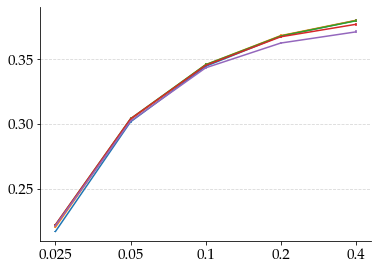

In [47]:
parse_data_tl('TwoChoice_DiffQ_eps_0.1', 'rewards_all_train', param1='eta', param2='alpha_w',
               title='TwoChoice_DiffQ_eps_0.1_sensitivity', firstn=-1, logbase=2, type='u-curves',
               location='./results_final/control_TC/', ylabel='Average\nreward\nobtained')

Filename	reference_state	alpha_w	Value

0.1_58.	10	0.4	0.377	0.001
0.1_48.	8	0.025	0.313	0.001
0.1_49.	8	0.05	0.352	0.001
_0.1_3.	1	0.2	0.347	0.001
0.1_12.	3	0.025	0.210	0.001
0.1_13.	3	0.05	0.268	0.001
_0.1_2.	1	0.1	0.319	0.001
_0.1_0.	1	0.025	0.210	0.001
0.1_39.	6	0.2	0.365	0.001
0.1_10.	2	0.4	0.308	0.001
0.1_38.	6	0.1	0.345	0.001
_0.1_1.	1	0.05	0.259	0.001
0.1_14.	3	0.1	0.298	0.001
0.1_28.	5	0.4	0.370	0.001
0.1_15.	3	0.2	0.313	0.001
_0.1_4.	1	0.4	0.356	0.001
_0.1_6.	2	0.025	0.210	0.001
0.1_16.	3	0.4	0.318	0.001
_0.1_7.	2	0.05	0.266	0.001
0.1_33.	0	0.2	0.360	0.001
0.1_27.	5	0.2	0.360	0.001
0.1_26.	5	0.1	0.334	0.001
0.1_32.	0	0.1	0.335	0.001
_0.1_9.	2	0.2	0.313	0.001
0.1_18.	4	0.025	0.210	0.001
0.1_24.	5	0.025	0.229	0.001
0.1_30.	0	0.025	0.210	0.001
0.1_31.	0	0.05	0.282	0.001
0.1_25.	5	0.05	0.281	0.001
0.1_19.	4	0.05	0.277	0.001
_0.1_8.	2	0.1	0.294	0.001
0.1_21.	4	0.2	0.356	0.001
0.1_34.	0	0.4	0.372	0.001
0.1_20.	4	0.1	0.327	0.001
0.1_36.	6	0.025	0.248	0.001
0.1_22.	4	0.4	0.343	0.001


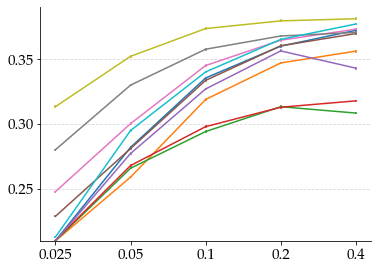

In [48]:
parse_data_tl('TwoChoice_RVIQ_eps_0.1', 'rewards_all_train', param1='reference_state', param2='alpha_w',
               title='TwoChoice_RVIQ_eps_0.1_sensitivity', firstn=-1, type='u-curves',
               location='./results_final/control_TC/', ylabel='Average\nreward\nobtained', logbase=2)

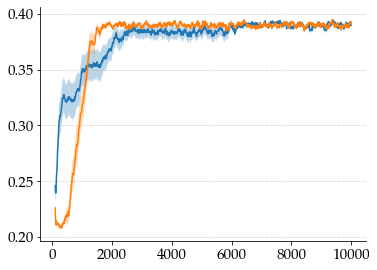

In [52]:
# best, best
### These filenames will be according to how the hyperparameter configurations are split
### for the available compute resources.
filenames = [
        "TwoChoice_RVIQ_eps_0.1_52.npy", # alpha_w=0.4, ref_state=8
        "TwoChoice_DiffQ_eps_0.1_16.npy", # alpha_w=0.4, eta=0.5
    ]
    
plot_learning_curve_control(filenames, title='TwoChoice_all_eps_0.1', window=100,
                            sample=10, firstn=10000, location='./results_final/control_TC/')

### A3. Domain: TwoStatesOneTransient — divergence when RVI-Q's reference state is transient  

In [ ]:
### To run the experiments with RVI-Q and Diff-Q:

# python run_exp.py --exp run_exp_learning_control_no_eval --config-file config_files/divergence_TwoStatesOneTrans_diff-q.json --output-folder results/control/Divergence
# python run_exp.py --exp run_exp_learning_control_no_eval --config-file config_files/divergence_TwoStatesOneTrans_rvi-q.json --output-folder results/control/Divergence

0.008918379200000002
[0. 0. 0. ... 0. 0. 0.]
[ 8.91837920e-03  1.02882081e+01 -9.00794424e-02  1.03150545e+01]
[ 8.91837920e-03  1.02882081e+01 -9.00794424e-02  1.03150545e+01]
TwoStateTrans_RVIQ_div-test_eps_1.0_alphaw_0.01_0.npy 0.01
2.0008856283367704
[ 0.         -0.0041     -0.0045734  ...  1.0416203   1.04161441
  1.04161046]
[ 0.00891838  1.04096363 -0.09007944  1.04108306]
[-1.03269208e+00 -6.46829137e-04 -1.13168991e+00 -5.27406644e-04]
TwoStateTrans_DiffQ_div-test_eps_1.0_alphaw_0.01_0.npy 0.01


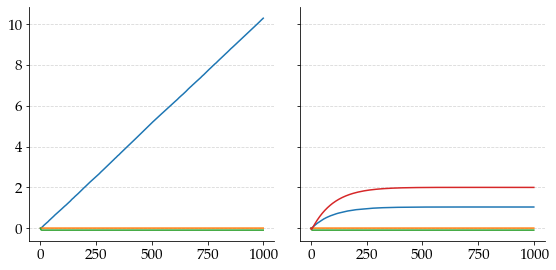

In [64]:
def plot_weights_twostatesonetrans(title, location='./results/', num_states=2,
                                   num_actions=2, which_step_size='alpha_w'):

    # color_map = [['red', 'magenta', 'orange'], ['limegreen', 'cyan', 'blue']]

    filenames = ['TwoStateTrans_RVIQ_div-test_eps_1.0_alphaw_0.01_0.npy',
                 'TwoStateTrans_DiffQ_div-test_eps_1.0_alphaw_0.01_0.npy']

    fig, axes = plt.subplots(1, 2, figsize = (8,4),
                             sharey='all')

    for i, filename in enumerate(filenames):
        data = np.load(location + filename, allow_pickle=True).item()
        weights = data['weights_all']
        avg_v_all = data['avg_v_all']
        avg_r_all = data['avg_r_all']
        num_runs = avg_r_all.shape[0]
        offset = np.mean(avg_v_all, axis=0)

        print(np.mean(avg_r_all[:,-1], axis=0))
        print(offset)
        x_s = np.arange(avg_v_all.shape[1]) * data['params']['exp_parameters']['eval_every_n_steps']

        print(np.mean(weights[:,-1,:], axis=0))
        print(np.mean(weights[:,-1,:], axis=0) - offset[-1])

        mean = np.mean(weights[:,:,1], axis=0)
        stderr = np.std(weights[:,:,1], axis=0) / np.sqrt(num_runs)
        axes[i].plot(x_s, mean, label='1,0')
        axes[i].fill_between(x_s, mean + stderr, mean - stderr, alpha=0.3)
        
        mean = np.mean(weights[:,:,0], axis=0)
        stderr = np.std(weights[:,:,0], axis=0) / np.sqrt(num_runs)
        axes[i].plot(x_s, mean, label='0,0')
        axes[i].fill_between(x_s, mean + stderr, mean - stderr, alpha=0.3)
        
        mean = np.mean(weights[:,:,2], axis=0)
        stderr = np.std(weights[:,:,2], axis=0) / np.sqrt(num_runs)
        axes[i].plot(x_s, mean, label='0,1')
        axes[i].fill_between(x_s, mean + stderr, mean - stderr, alpha=0.3)
        
        if 'DiffQ' in filename:
            mean = np.mean(avg_r_all, axis=0)
            stderr = np.std(avg_r_all, axis=0) / np.sqrt(num_runs)
            axes[i].plot(x_s, mean, label=r'$\bar{R}$')
            axes[i].fill_between(x_s, mean + stderr, mean - stderr, alpha=0.3)

        ss = data['params']['agent_parameters'][which_step_size]
        print(filename, ss)
        # axes[i].legend()
        axes[i].grid(b=True, axis='y', alpha=0.5, linestyle='--')

    plt.tight_layout()
    assert os.path.isfile(location + title + '_weights.png') == False, "File already exists. Don't overwrite!"
    plt.savefig(location + title + '_weights.png', dpi=1200)
    plt.show()
    
plot_weights_twostatesonetrans('TwoStateTrans_div_eps1.0_alphaw_0.01_withR')

## B. Prediction experiments

### Domain: TwoLoop

In [ ]:
### To run the experiments with Avg-cost TD, on-policy Diff-TD, off-policy Diff-TD:

# python run_exp.py --exp run_exp_learning_prediction --config-file config_files/prediction_TwoLoop_avgcost-td.json --output-folder results/prediction/TwoLoop/
# python run_exp.py --exp run_exp_learning_prediction --config-file config_files/prediction_TwoLoop_diff-td.json --output-folder results/prediction/TwoLoop/
# python run_exp.py --exp run_exp_learning_prediction --config-file config_files/prediction_TwoLoop_diff-td-off.json --output-folder results/prediction/TwoLoop/

In [190]:
def parse_data(filename_prefix, item, location='./results/', param1='alpha_w', param2='dummy',
               title=None, firstn=-1, type='heatmap', num_sa=None, logbase=-1, ylabel='RMSVE\n(TVR)'):

    files = all_files_with_prefix_and_suffix(location, filename_prefix, '*.npy')
    data_all = {}
    assert len(files) > 0, 'No files found with the prefix: ' + location + filename_prefix
    print('Filename\t%s\t%s\tValue\n' % (param1, param2))
    for file in files:
        data = np.load(file, allow_pickle=True).item()
        param1_value = data['params']['agent_parameters'][param1]
        if param1_value not in data_all:
            data_all[param1_value] = {}
        param2_value = data['params']['agent_parameters'][param2] if param2!='dummy' else -1
        if param2_value not in data_all[param1_value]:
            data_all[param1_value][param2_value] = {}
        data_to_eval = data[item][:,:firstn]
        mean = np.mean(data_to_eval)
        stderr = np.std(data_to_eval) / np.sqrt(data_to_eval.size)
        data_all[param1_value][param2_value] = (mean, stderr)
        print('%s\t%s\t%s\t%.3f\t%.3f' % (file[-6:-3], param1_value, param2_value, mean, stderr))

    X = sorted(data_all)
    Y = sorted(data_all[np.random.choice(list(data_all.keys()))])
    Z_mean = np.zeros((len(X), len(Y)))
    Z_stderr = np.zeros((len(X), len(Y)))
    for i, x in enumerate(X):
        for j, y in enumerate(Y):
            try:
                Z_mean[i][j] = data_all[x][y][0]
                Z_stderr[i][j] = data_all[x][y][1]
            except:
                Z_mean[i][j] = np.nan
                Z_stderr[i][j] = np.nan

    fig, ax = plt.subplots(1, 1, figsize=(5.7,4))

    # ax.set_xticks(np.arange(len(Y)))
    # ax.set_xticklabels(Y)
    for i, param_value in enumerate(X):
        ax.errorbar(Y, Z_mean[i], yerr=Z_stderr[i], label=param1+'='+str(param_value))#, color='color')
    ax.grid(b=True, axis='y', alpha=0.5, linestyle='--')
#     ax.legend()
#     plt.xlabel(param2)
#     plt.ylabel('RMSVE\n(TVR)', rotation=0, labelpad=40)
#     ax.set_title(title)
    plt.ylim(0.0, 0.5)
    if logbase != -1:
        plt.xscale('log', basex=logbase)
#     ax.set_xticklabels(Y)
#     plt.xticks(np.arange(len(Y)), Y)
    ax.set_xticks(Y)
    ax.set_xticklabels(Y)

    fig.tight_layout()
    assert os.path.isfile(location + title + '.png') == False, "File already exists. Don't overwrite!"
    plt.savefig(location + title + '.png', dpi=1200)
    plt.show()

Filename	eta	alpha_w	Value

15.	0.5	0.2	0.077	0.000
28.	2	0.4	0.221	0.000
14.	0.5	0.1	0.066	0.000
16.	0.5	0.4	0.106	0.000
13.	0.5	0.05	0.076	0.000
12.	0.5	0.025	0.117	0.000
_8.	0.25	0.1	0.067	0.000
10.	0.25	0.4	0.128	0.000
_9.	0.25	0.2	0.083	0.000
_4.	0.125	0.4	0.200	0.000
20.	1	0.1	0.093	0.000
21.	1	0.2	0.120	0.000
_7.	0.25	0.05	0.076	0.000
22.	1	0.4	0.162	0.000
_6.	0.25	0.025	0.116	0.000
_2.	0.125	0.1	0.076	0.000
26.	2	0.1	0.141	0.000
27.	2	0.2	0.181	0.000
_3.	0.125	0.2	0.107	0.000
_1.	0.125	0.05	0.079	0.000
19.	1	0.05	0.090	0.000
25.	2	0.05	0.120	0.000
24.	2	0.025	0.137	0.000
18.	1	0.025	0.122	0.000
_0.	0.125	0.025	0.117	0.000


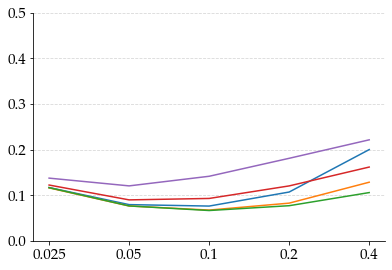

In [191]:
parse_data('TwoChoice_DiffTDon', 'rmsve_tvr_all', param1='eta', param2='alpha_w',
               title='TwoChoice_DiffTD_sensitivity', firstn=-1, logbase=2, type='u-curves',
               location='./results/prediction/TwoLoop/')

Filename	eta	alpha_w	Value

_1.	0.125	0.05	0.088	0.000
_0.	0.125	0.025	0.118	0.000
_2.	0.125	0.1	0.101	0.000
_3.	0.125	0.2	0.179	0.000
_7.	0.25	0.05	0.092	0.000
_6.	0.25	0.025	0.119	0.000
_4.	0.125	0.4	0.446	0.000
26.	2	0.1	0.259	0.000
27.	2	0.2	0.445	0.000
19.	1	0.05	0.123	0.000
25.	2	0.05	0.162	0.000
24.	2	0.025	0.142	0.000
18.	1	0.025	0.128	0.000
20.	1	0.1	0.186	0.000
21.	1	0.2	0.357	0.000
22.	1	0.4	0.802	0.000
13.	0.5	0.05	0.102	0.000
12.	0.5	0.025	0.121	0.000
10.	0.25	0.4	0.535	0.000
15.	0.5	0.2	0.269	0.000
28.	2	0.4	0.830	0.000
14.	0.5	0.1	0.139	0.000
16.	0.5	0.4	0.669	0.000
_8.	0.25	0.1	0.114	0.000
_9.	0.25	0.2	0.211	0.000


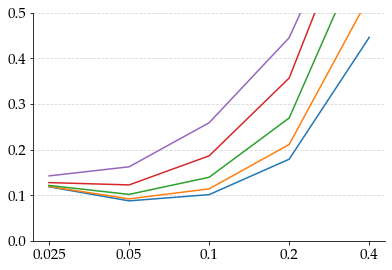

In [192]:
parse_data('TwoChoice_AvgCostTD', 'rmsve_tvr_all', param1='eta', param2='alpha_w',
               title='TwoChoice_AvgCostTD_sensitivity', firstn=-1, logbase=2, type='u-curves',
               location='./results/prediction/TwoLoop/')

Filename	eta	alpha_w	Value

_8.	0.25	0.1	0.161	0.000
_9.	0.25	0.2	0.198	0.000
15.	0.5	0.2	0.158	0.000
14.	0.5	0.1	0.150	0.000
28.	2	0.4	1200935862157777856821056079020773667130516176896.000	58193536377871104490637172465262649266174689280.000
16.	0.5	0.4	0.233	0.000
13.	0.5	0.05	0.197	0.000
12.	0.5	0.025	0.339	0.000
10.	0.25	0.4	0.371	0.000
20.	1	0.1	0.185	0.000
21.	1	0.2	0.204	0.000
22.	1	0.4	0.366	0.002
26.	2	0.1	0.233	0.000
27.	2	0.2	0.253	0.000
25.	2	0.05	0.240	0.000
19.	1	0.05	0.211	0.000
18.	1	0.025	0.331	0.000
24.	2	0.025	0.329	0.000
_4.	0.125	0.4	0.900	0.001
_7.	0.25	0.05	0.204	0.000
_6.	0.25	0.025	0.352	0.000
_2.	0.125	0.1	0.192	0.000
_3.	0.125	0.2	0.302	0.000
_1.	0.125	0.05	0.221	0.000
_0.	0.125	0.025	0.376	0.000


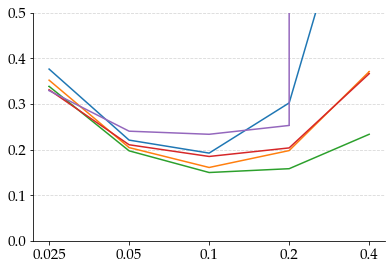

In [193]:
parse_data('TwoChoice_DiffTDoff', 'rmsve_tvr_all', param1='eta', param2='alpha_w',
               title='TwoChoice_DiffTDoff_sensitivity', firstn=-1, logbase=2, type='u-curves',
               location='./results/prediction/TwoLoop/')

In [126]:
def plot_learning_curve_prediction(filenames, location='./results/', item=None, title='LearningCurves',
                        first_n=-1, y_label=None, type='error_bars', sample=1, window=50):

    plt.figure(figsize=(5.7,4))

    for f in filenames:

        data_raw = np.load(location + f, allow_pickle=True).item()
        data_to_evaluate = data_raw[item][:,:first_n]
        num_runs = data_to_evaluate.shape[0]
        max_run_length = data_to_evaluate.shape[1]

        # ToDo: figure out a way to vectorize this
        data_smoothed = []
        conv_arr = np.ones(window)
        for run in range(num_runs):
            data_smoothed.append(np.convolve(data_to_evaluate[run,:], conv_arr, mode='valid') / window)
        data_to_evaluate = np.array(data_smoothed)

        mean = np.mean(data_to_evaluate, axis=0)
        stderr = np.std(data_to_evaluate, axis=0) / np.sqrt(data_to_evaluate.shape[0])
        agent_name = data_raw['params']['agent']

        x_s = np.arange(window, max_run_length+1)[::sample]
        y_s = mean[::sample]
        stderr_s = stderr[::sample]
        print(agent_name)
        if type == 'fill_between':
            plt.plot(x_s, y_s, label=agent_name)
            plt.fill_between(x_s, y_s + stderr_s, y_s - stderr_s, alpha=0.3)
        else:
            plt.errorbar(x_s, y_s, yerr=stderr_s, label=agent_name)

#     plt.xlabel('Timesteps')
#     plt.ylabel(y_label, rotation=0, labelpad=70)
#     plt.legend()
#     plt.title(title)
    plt.grid(b=True, axis='y', alpha=0.5, linestyle='--')
#     plt.axhline(y=0.0, color='black', alpha=0.3, linestyle='--')
    plt.tight_layout()
    assert os.path.isfile(location + title + '_lc.png') == False, "File already exists. Don't overwrite!"
    plt.savefig(location + title + '_lc.png', dpi=1200)
    plt.show()

DifferentialTDAgent
AvgCostTDAgent
DifferentialTDAgent


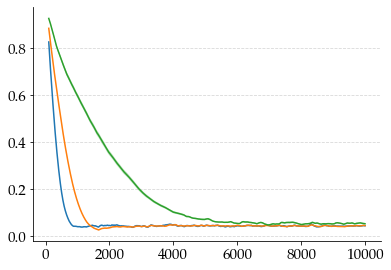

In [128]:
fileroots = [
        "TwoChoice_DiffTD_8.npy",   # alpha_w = 0.1, eta = 0.25 (best AUC)
        "TwoChoice_AvgCostTD_1.npy",   # alpha_w = 0.05, eta = 0.125 (best AUC)
        "TwoChoice_DiffTDoff_13.npy",  # alpha_w = 0.05, eta = 0.5 (best asymptotic)
    ]

plot_learning_curve_prediction(fileroots, title='TwoChoice_TVR_all', item='rmsve_tvr_all',
                               y_label='RMSVE_TVR', type='fill_between', location='./results/prediction/TwoLoop/', 
                               sample=1, window=100, first_n=10000)

## C. Centering experiments

### Control on TwoLoop

In [ ]:
### To run the experiments with centered Differential Q-learning:

# python run_exp.py --exp run_exp_learning_control_no_eval --config-file config_files/centering_TwoLoop_diff-q.json --output-folder results/centering/TwoLoop/

In [84]:
def get_centered_values(env, policy):
    with open("environments/centered_values.json") as f:
        centered_values_all = json.load(f)
    try:
        centered_values = centered_values_all[env][policy]
    except:
        print("Something went wrong. Have the centered_values for this policy in this environment not saved"
              "in environments/centered_values.json?")
        raise

    return centered_values

def parse_data_rmsve(filename_prefix, domain, policy, location='../results/', param1='eta_f', param2='alpha_w_f',
               title=None, firstn=-1, num_sa=None, logbase=-1, ylabel='RMSVE'):

    centered_values = get_centered_values(domain, policy)
    target = centered_values["q_pi"]
    dist_sa = centered_values["d_pi_sa"]

    files = all_files_with_prefix_and_suffix(location, filename_prefix, '*.npy')
    data_all = {}
    assert len(files) > 0, 'No files found with the prefix: ' + location + filename_prefix
    print('Filename\t%s\t%s\tAUC\tAsymMean\tAsymStderr\n' % (param1, param2))

    for file in files:
        data = np.load(file, allow_pickle=True).item()
        param1_value = data['params']['agent_parameters'][param1]
        if param1_value not in data_all:
            data_all[param1_value] = {}
        param2_value = data['params']['agent_parameters'][param2] if param2!='dummy' else -1
        if param2_value not in data_all[param1_value]:
            data_all[param1_value][param2_value] = {}

        weights_all = data['weights_all'][:,:firstn]
        avg_v_all = data['avg_v_all'][:,:firstn]
        num_runs = weights_all.shape[0]
        num_eval_steps = weights_all.shape[1]
        weights = weights_all
        offsets = avg_v_all
        rmsve = np.zeros((num_runs, num_eval_steps))

        for i in range(num_runs):
            for j in range(num_eval_steps):
                final_weights = weights[i,j,:]-offsets[i][j]
                rmsve[i][j] = np.sqrt(np.dot((target - final_weights)**2, dist_sa))

        rmsve_auc = np.mean(rmsve)
        rmsve_asymptotic = np.mean(rmsve[:,num_eval_steps//2:], axis=1)
        rmsve_asymptotic_mean = np.mean(rmsve_asymptotic)
        rmsve_asymptotic_stderr = np.std(rmsve_asymptotic) / np.sqrt(num_runs)

        alpha_w_f = data['params']['agent_parameters']['alpha_w_f']
        eta_f = data['params']['agent_parameters']['eta_f']
        data_all[param1_value][param2_value] = (rmsve_asymptotic_mean, rmsve_asymptotic_stderr)

        print('%s\t%s\t%s\t%.3f\t%.3f\t%.3f' % (file[-6:-4], param1_value, param2_value,
                                                rmsve_auc, rmsve_asymptotic_mean, rmsve_asymptotic_stderr))

    X = sorted(data_all)
    Y = sorted(data_all[np.random.choice(list(data_all.keys()))])
    Z_mean = np.zeros((len(X), len(Y)))
    Z_stderr = np.zeros((len(X), len(Y)))
    for i, x in enumerate(X):
        for j, y in enumerate(Y):
            try:
                Z_mean[i][j] = data_all[x][y][0]
                Z_stderr[i][j] = data_all[x][y][1]
            except:
                Z_mean[i][j] = np.nan
                Z_stderr[i][j] = np.nan
    Z_mean = np.ma.masked_invalid(Z_mean)
    Z_stderr = np.ma.masked_invalid(Z_stderr)

    fig, ax = plt.subplots(1, 1, figsize=(5.5,4))

    for i, param_value in enumerate(X):
        ax.errorbar(Y, Z_mean[i], yerr=Z_stderr[i], label=param1+'='+str(param_value))#, color='color')
    ax.grid(b=True, axis='y', alpha=0.5, linestyle='--')
#     plt.xlabel(param2)
#     plt.ylabel(ylabel, rotation=0, labelpad=40)
#     ax.set_title(title)
#     ax.legend()
    # plt.ylim(0.0, 0.8)
    if logbase != -1:
        plt.xscale('log', basex=logbase)
    ax.set_xticks(Y)
    ax.set_xticklabels(Y)

    fig.tight_layout()
    assert os.path.isfile(location + title + '.png') == False, "File already exists. Don't overwrite!"
    plt.savefig(location + title + '.png', dpi=1200)
    plt.show()

def get_rmsve_data_lc(filename, domain, policy, firstn=-1):

    centered_values = get_centered_values(domain, policy)
    target = centered_values["q_pi"]
    dist_sa = centered_values["d_pi_sa"]

    data = np.load(filename, allow_pickle=True).item()
    weights_all = data['weights_all'][:,:firstn]
    avg_v_all = data['avg_v_all'][:,:firstn]
    num_runs = weights_all.shape[0]
    num_eval_steps = weights_all.shape[1]
    weights = weights_all
    offsets = avg_v_all
    rmsve = np.zeros((num_runs, num_eval_steps))

    for i in range(num_runs):
        for j in range(num_eval_steps):
            final_weights = weights[i,j,:]-offsets[i][j]
            rmsve[i][j] = np.sqrt(np.dot((target - final_weights)**2, dist_sa))

    mean_rmsve = np.mean(rmsve, axis=0)
    stderr_rmsve = np.std(rmsve, axis=0) / np.sqrt(num_runs)

    print(np.mean(weights[:,-1,:], axis=0))
    print(np.mean(offsets[:,-1]))
    print(np.mean(weights[:,-1,:], axis=0) - np.mean(offsets[:,-1]))
    agent_name = data['params']['agent']
    alpha_w = data['params']['agent_parameters']['alpha_w']
    print(filename)

    params = {'agent': agent_name, 'alpha_w': alpha_w}
    if 'alpha_r' in data['params']['agent_parameters']:
        params['alpha_r'] = data['params']['agent_parameters']['alpha_r']
    if 'alpha_w_f' in data['params']['agent_parameters']:
        params['alpha_w_f'] = data['params']['agent_parameters']['alpha_w_f']
    print(params)
    x_s = np.arange(num_eval_steps) * data['params']['exp_parameters']['eval_every_n_steps']
    reward_rate_train = data['rewards_all_train']
    reward_rate_train_lasthalf = np.mean(reward_rate_train[:,reward_rate_train.shape[1]//2:])
    return params, x_s, mean_rmsve, stderr_rmsve, reward_rate_train_lasthalf

def plot_learning_curve_rmsve(filenames, domain, policy, location='./results/', title=None, sample=1, firstn=-1):

    fig, ax = plt.subplots(1, 1, figsize=(5.5,4))
    
    for file in filenames:
        params, x_s, mean_rmsve, stderr_rmsve, _ = get_rmsve_data_lc(location + file, domain, policy, firstn)
        x_s = x_s[::sample]
        mean_rmsve = mean_rmsve[::sample]
        stderr_rmsve = stderr_rmsve[::sample]
        plt.plot(x_s, mean_rmsve, label=params['agent'])
        # print(mean_rmsve[0], stderr_rmsve[0])
        plt.fill_between(x_s, mean_rmsve + stderr_rmsve, mean_rmsve - stderr_rmsve, alpha=0.3)
        # plot_data[step_size] = (max_msve, 0) if average_msve >= max_msve else (average_msve, stderr_msve)

#     plt.legend()
#     plt.ylabel('RMSVE\nduring training', rotation=0, labelpad=70)
#     plt.xlabel('Timesteps')
    plt.grid(b=True, axis='y', alpha=0.5, linestyle='--')
    # plt.axhline(y=0.0, color='black', alpha=0.7, linestyle='--')
    plt.ylim(-0.1, 3.0)
    plt.tight_layout()
    assert os.path.isfile(location + title + '.png') == False, "File already exists. Don't overwrite!"
    plt.savefig(location + title + '.png', dpi=1200)
    plt.show()


Filename	eta_f	alpha_w_f	AUC	AsymMean	AsymStderr

_9	1	0.025	0.128	0.057	0.001
_8	0.5	0.1	0.098	0.011	0.000
12	2	0.025	0.134	0.062	0.001
13	2	0.05	0.125	0.043	0.001
11	1	0.1	0.105	0.016	0.000
10	1	0.05	0.118	0.037	0.001
28	2	0.4	0.105	0.010	0.000
14	2	0.1	0.114	0.024	0.001
15	0.125	0.2	0.083	0.001	0.000
16	0.125	0.4	0.082	0.000	0.000
27	2	0.2	0.106	0.014	0.000
24	1	0.2	0.096	0.006	0.000
18	0.25	0.2	0.086	0.001	0.000
19	0.25	0.4	0.084	0.001	0.000
25	1	0.4	0.092	0.003	0.000
21	0.5	0.2	0.090	0.002	0.000
22	0.5	0.4	0.087	0.001	0.000
_0	0.125	0.025	0.127	0.047	0.001
_1	0.125	0.05	0.101	0.023	0.001
_3	0.25	0.025	0.122	0.050	0.001
_2	0.125	0.1	0.087	0.005	0.000
_6	0.5	0.025	0.124	0.053	0.001
_7	0.5	0.05	0.111	0.032	0.001
_5	0.25	0.1	0.092	0.007	0.000
_4	0.25	0.05	0.105	0.027	0.001


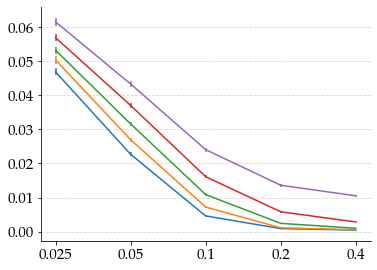

In [85]:
parse_data_rmsve('TwoChoice_DiffQ_eps_0.1_alpha_0.4_eta_0.5', domain="TwoChoiceMDP", policy="0.0",
                 param1='eta_f', param2='alpha_w_f', 
                 title='TwoChoice_centering_sensitivity', firstn=-1, logbase=2,
                 location='./results/centering/TwoLoop/')

[-2.19748381e+00 -2.80008254e+00 -2.41881610e+00 -2.08311490e+00
 -1.66168247e+00 -8.00000000e-01 -4.00000000e-01  3.02106015e-17
  4.00000000e-01 -1.20000000e+00 -2.83267014e+00 -2.42293073e+00
 -2.13234598e+00 -1.61748492e+00 -8.00000000e-01 -4.00000000e-01
  4.01564917e-17  4.00000000e-01]
0.0
[-2.19748381e+00 -2.80008254e+00 -2.41881610e+00 -2.08311490e+00
 -1.66168247e+00 -8.00000000e-01 -4.00000000e-01  3.02106015e-17
  4.00000000e-01 -1.20000000e+00 -2.83267014e+00 -2.42293073e+00
 -2.13234598e+00 -1.61748492e+00 -8.00000000e-01 -4.00000000e-01
  4.01564917e-17  4.00000000e-01]
./results_final/centering_control_TC/TwoChoice_RVIQ_eps_0.1_52.npy
{'agent': 'RVIQlearningAgent', 'alpha_w': 0.4}
[-0.89840809 -1.49852536 -1.09865734 -0.69894646 -0.30798973  0.50056716
  0.90058178  1.30060348  1.70051352  0.10061793 -1.49846334 -1.09869753
 -0.69894764 -0.30639933  0.50053708  0.90054775  1.30053597  1.70052645]
0.0
[-0.89840809 -1.49852536 -1.09865734 -0.69894646 -0.30798973  0.500567

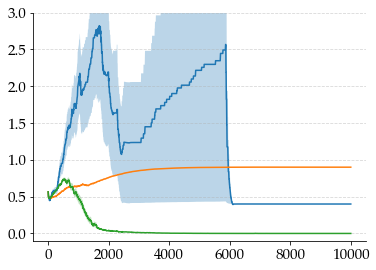

In [79]:
filenames = [
        "TwoChoice_RVIQ_eps_0.1_52.npy", # alpha=0.4, ref_state=8
        "TwoChoice_DiffQ_eps_0.1_16.npy", # alpha=0.4, eta=0.5
        "TwoChoice_DiffQ_eps_0.1_alpha_0.4_eta_0.5_16.npy" # alpha=0.4, eta=0.5, alpha_f=0.4, eta_f=0.125
    ]

plot_learning_curve_rmsve(filenames, "TwoChoiceMDP", "0.0", location='./results/',
                          title='TwoChoice_centering_rmsve_lc', sample=1, firstn=10000)